<a href="https://colab.research.google.com/github/divyani95/Radiation_Analysis/blob/main/Radiation_Analysis(WMS26).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the Excel file
file_path = "/content/Book3.xlsx"  # Change this to your file path
df = pd.read_excel(file_path)

In [3]:
df = pd.read_excel(file_path, header=None)  # Load without assigning headers
print("Preview of Raw Data:")
print(df.head(10))

Preview of Raw Data:
                    0              1              2                    3   \
0           Time Stamp  Radiation GHI  Radiation GII  Radiation GHI   Acc   
1                  NaN         (w/m2)         (w/m2)             (kwh/m2)   
2  2025-01-01 00:00:02              0              0                 3.51   
3  2025-01-01 00:01:02              0              0                    0   
4  2025-01-01 00:02:02              0              0                    0   
5  2025-01-01 00:03:02              0              0                    0   
6  2025-01-01 00:04:02              0              0                    0   
7  2025-01-01 00:05:02              0              0                    0   
8  2025-01-01 00:06:02              0              0                    0   
9  2025-01-01 00:07:02              0              0                    0   

                     4           5                 6         7   \
0  Radiation GII  \nAcc  Wind Speed  WInd \nDirection  Humidity 

In [4]:
# Rename columns for consistency
df.columns = ["Time_Stamp", "Radiation_GHI", "Radiation_GII", "Radiation_GHI_Acc",
              "Radiation_GII_Acc", "Wind_Speed", "Wind_Direction", "Humidity",
              "Ambient_Temperature", "Module_Temperature", "Rain",
              "Diffuse_Radiation", "Today_Rain"]

In [7]:
# Convert Time_Stamp to datetime
df["Time_Stamp"] = pd.to_datetime(df["Time_Stamp"], errors="coerce")

In [8]:
# Convert numeric columns
numeric_columns = df.columns[1:]  # Exclude Time_Stamp
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [9]:
# Drop missing values
df = df.dropna(subset=["Time_Stamp"])

In [10]:
# Set Time_Stamp as index for resampling
df.set_index("Time_Stamp", inplace=True)

In [11]:
# Resample data to hourly intervals (mean values per hour)
df_resampled = df.resample("H").mean()

<ipython-input-11-4ab7a98e3bcf>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample("H").mean()


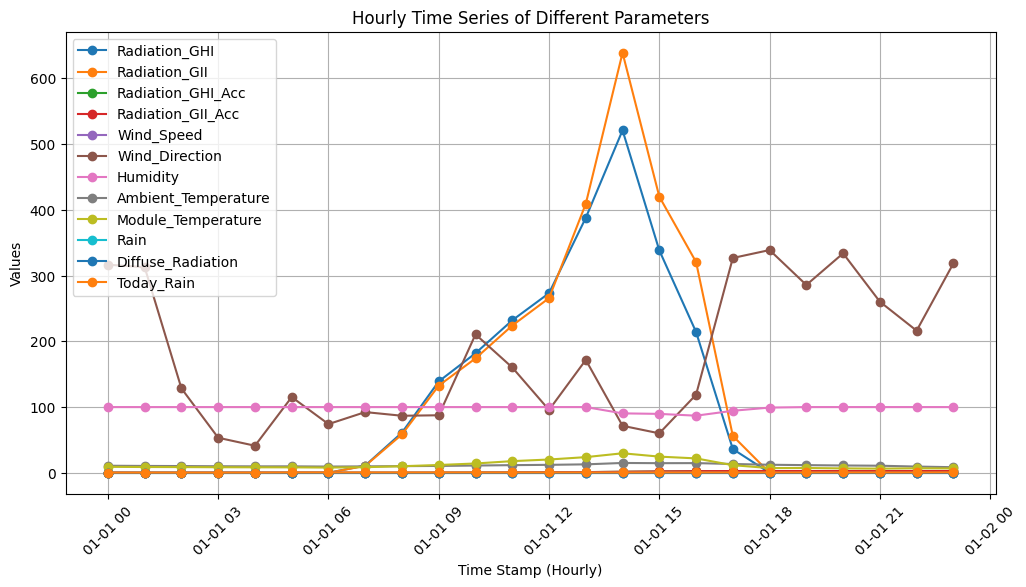

In [12]:
# Plot each resampled column against Time_Stamp
plt.figure(figsize=(12, 6))
for col in numeric_columns:
    plt.plot(df_resampled.index, df_resampled[col], label=col, marker='o', linestyle="-")

plt.xlabel("Time Stamp (Hourly)")
plt.ylabel("Values")
plt.title("Hourly Time Series of Different Parameters")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()